In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mymat = np.random.rand(3,5)

In [3]:
print(mymat)

[[0.47815194 0.88902646 0.67182427 0.25795028 0.2006149 ]
 [0.44887788 0.83902579 0.46696526 0.61434971 0.14988552]
 [0.00701679 0.67143629 0.58269563 0.51441043 0.60365866]]


In [4]:
def myNorm(x):
    return np.sqrt(np.square(x).sum())
def checkDiff(A,B):
    return np.square(A-B).mean()

In [5]:
def diagonaliseFat(mat):
    nRows  = mat.shape[0]
    nCols = mat.shape[1]
    vs = []
    us = []
    S = np.zeros((nRows,nRows))
    for i in range(nRows):
        temp = mat[i]
        for j in range(i):
            temp -= np.dot(mat[i],vs[j].reshape(-1))*vs[j].reshape(-1)
        vs.append((temp/myNorm(temp)).reshape(-1,1))
    for i in range(nRows):
        temp = np.matmul(mat,vs[i].reshape((-1,1)))
        S[i][i] = myNorm(temp)
        us.append(temp/S[i][i])
    V = np.concatenate(vs, axis =1)
    U = np.concatenate(us, axis =1)
    return U,S,V

In [6]:
U,S,V = diagonaliseFat(mymat)

In [7]:
print(U)

[[ 1.00000000e+00 -1.85266634e-15 -1.95715926e-16]
 [-1.76306586e-16  1.00000000e+00 -4.41589234e-17]
 [-2.51427542e-17 -1.11428845e-16  1.00000000e+00]]


In [8]:
print(V)

[[ 0.38074324  0.01319441 -0.60016763]
 [ 0.70791475  0.03538106 -0.0618042 ]
 [ 0.5349608  -0.38255308  0.21905055]
 [ 0.20540087  0.91889523  0.17423467]
 [ 0.1597458  -0.08864979  0.74675176]]


In [9]:
print(S)

[[1.25583831 0.         0.        ]
 [0.         0.40820501 0.        ]
 [0.         0.         0.62234226]]


In [10]:
ans = np.matmul(np.matmul(U,S),V.T)

In [11]:
checkDiff(ans,mymat)

5.153031199353154e-32

# Question 2 and 3

In [12]:
bitstream = np.random.randint(2, size=96)

In [13]:
bitstream

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1])

### BPSK

In [14]:
M = 2
step = round(np.log2(M))
fc = 5e7
dt = 1/5e8
mbps = 5
T = np.log2(M)/(mbps*1e6)
L = len(bitstream)

nT = round(T/dt)
bpskOut = np.zeros(nT*L)
bpskTheta = [2*a*np.pi/M for a in range(M)]

In [15]:
for i in range(0,L,step):
    m =0
    for j in range(step):
        m = 2*m + bitstream[i+j] 
    for j in range(nT):
        idx = int(i/step*nT+j)
        ti = float(idx*dt)
        angle = 2*np.pi*fc*ti+bpskTheta[m]
        bpskOut[idx] = np.cos(angle)

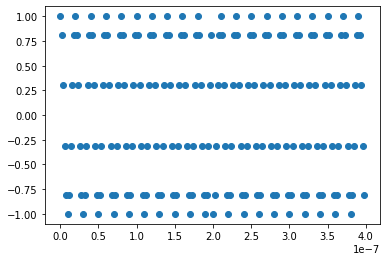

In [16]:
t = np.arange(0,len(bpskOut)*dt, dt)
plt.scatter(t[:200], bpskOut[:200])
plt.show()

In [17]:
out = np.zeros_like(bitstream)
for i in range(0,L,step):
    temp = bpskOut[i*nT:(i+1)*nT].reshape((-1,1))
    temp/=myNorm(temp)
    tis = (np.arange(i*nT,nT*(1+i),1.0))*dt
    phis = np.zeros((M,nT))
    for j in range(M):
        angle = 2*np.pi*fc*tis+bpskTheta[j]
        phis[j] = np.cos(angle)
        phis[j] /= myNorm(phis[j])
    
    cor = np.matmul(phis,temp)
    m = np.argmax(cor)
    bstr = "{0:b}".format(m).zfill(step)
    for j in range(step):
        oi = 1
        if bstr[j]=='0':
            oi=0
        out[i+j] = oi


In [18]:
out

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1])

### QPSK

In [19]:
M = 4
step = round(np.log2(M))
fc = 5e7
dt = 1/5e8
mbps = 5
T = step/(mbps*1e6)
L = len(bitstream)

nT = round(T/dt)
qpskOut = np.zeros(round(nT*L/step))
qpskTheta = [2*a*np.pi/M for a in range(M)]

In [20]:
bitstream


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1])

In [21]:
for i in range(0,L,step):
    m =0
    for j in range(step):
        m = 2*m + bitstream[i+j] 
    for j in range(nT):
        idx = int(i/step*nT+j)
        ti = float(idx*dt)
        angle = 2*np.pi*fc*ti+qpskTheta[m]
        qpskOut[idx] = np.cos(angle)

In [22]:
qpskOut

array([ 6.12323400e-17, -5.87785252e-01, -9.51056516e-01, ...,
       -9.51056516e-01, -9.51056516e-01, -5.87785252e-01])

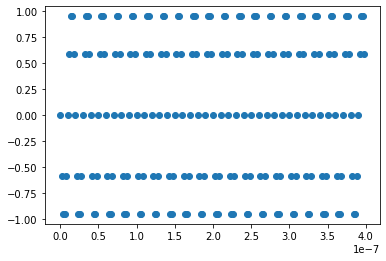

In [23]:
t = np.arange(0,len(qpskOut)*dt, dt)
plt.scatter(t[:200], qpskOut[:200])
plt.show()

In [24]:
out = np.zeros_like(bitstream)
for i in range(0,L,step):
    temp = qpskOut[int(i/step*nT):int(i/step*nT)+nT].reshape((nT,1))
    temp/=myNorm(temp)
#     tis = (np.arange(i*nT,nT*(1+i),1.0))*dt
    tis = (np.arange(int(i/step*nT),int(i/step*nT)+nT,1.0))*dt
    phis = np.zeros((M,nT))
    for j in range(M):
        angle = 2*np.pi*fc*tis+qpskTheta[j]
        phis[j] = np.cos(angle)
        phis[j] /= myNorm(phis[j])
    
    cor = np.matmul(phis,temp)
    m = np.argmax(cor)
    bstr = "{0:b}".format(m).zfill(step)
    for j in range(step):
        oi = 1
        if bstr[j]=='0':
            oi=0
        out[i+j] = oi


In [25]:
out

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1])

In [26]:
checkDiff(out, bitstream)

0.0

### 8-PSK

In [27]:
M = 8
step = round(np.log2(M))
fc = 5e7
sr = 5e8
dt = 1/sr
mbps = 5
T = step/(mbps*1e6)
L = len(bitstream)

nT = round(T/dt)
opskOut = np.zeros(round(nT*L/step))
opskTheta = [2*a*np.pi/M for a in range(M)]

In [28]:
for i in range(0,L,step):
    m =0
    for j in range(step):
        m = 2*m + bitstream[i+j] 
    for j in range(nT):
        idx = int(i/step*nT+j)
        ti = float(idx*dt)
        angle = 2*np.pi*fc*ti+opskTheta[m]
        opskOut[idx] = np.cos(angle)

In [29]:
opskOut

array([ 6.12323400e-17, -5.87785252e-01, -9.51056516e-01, ...,
       -8.91006524e-01, -4.53990500e-01,  1.56434465e-01])

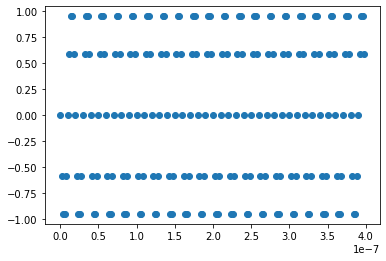

In [30]:
t = np.arange(0,len(opskOut)*dt, dt)
plt.scatter(t[:200], opskOut[:200])
plt.show()

In [31]:
out = np.zeros_like(bitstream)
for i in range(0,L,step):
    temp = opskOut[int(i/step*nT):int(i/step*nT)+nT].reshape((nT,1))
    temp/=myNorm(temp)
#     tis = (np.arange(i*nT,nT*(1+i),1.0))*dt
    tis = (np.arange(int(i/step*nT),int(i/step*nT)+nT,1.0))*dt
    phis = np.zeros((M,nT))
    for j in range(M):
        angle = 2*np.pi*fc*tis+opskTheta[j]
        phis[j] = np.cos(angle)
        phis[j] /= myNorm(phis[j])
    
    cor = np.matmul(phis,temp)
    m = np.argmax(cor)
    bstr = "{0:b}".format(m).zfill(step)
    for j in range(step):
        oi = 1
        if bstr[j]=='0':
            oi=0
        out[i+j] = oi

In [32]:
out

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1])

In [33]:
checkDiff(out, bitstream)

0.0

### 16-QAM

In [13]:
def smIndexer(n,nr):
    return n//nr, n%nr

In [14]:
M = 16
step = round(np.log2(M))
fc = 5e7
sr = 5e8
dt = 1/sr
mbps = 5
T = step/(mbps*1e6)
L = len(bitstream)

nT = round(T/dt)
mx = round(np.sqrt(M))
Ami = np.asarray([2*a-mx+1 for a in range(mx)])
# Amq = np.copy(Ami)
Amq = np.asarray([2*(2*a-mx+1)+1 for a in range(mx)])
QAM16Out = np.zeros(round(nT*L/step))

In [15]:
Amq = np.asarray([-10,-4,4,10])

In [16]:
for i in range(0,L,step):
    m =0
    for j in range(step):
        m = 2*m + bitstream[i+j] 
    for j in range(nT):
        idx = round(i/step*nT+j)
        ti = float(idx*dt)
        angle = 2*np.pi*fc*ti
        a, b = smIndexer(m,mx)
        A = np.complex(Ami[a],Ami[b]) 
        QAM16Out[idx] = (A*np.exp(np.complex(0,angle))).real

In [17]:
QAM16Out

array([-3.        , -4.19040674, -3.78022053, ...,  0.02400553,
        1.8781075 ,  3.01483624])

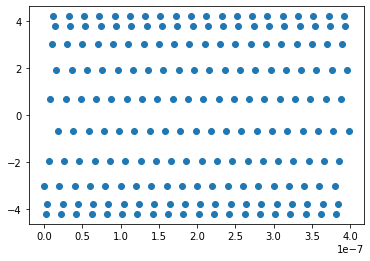

In [18]:
t = np.arange(0,len(QAM16Out)*dt, dt)
plt.scatter(t[:200], QAM16Out[:200])
plt.show()

In [19]:
out = np.zeros_like(bitstream)
for i in range(0,L,step):
    temp = QAM16Out[int(i/step*nT):int(i/step*nT)+nT].reshape((nT,1))
    temp/=myNorm(temp)
#     tis = (np.arange(i*nT,nT*(1+i),1.0))*dt
    tis = (np.arange(int(i/step*nT),int(i/step*nT)+nT,1.0))*dt
    phis = np.zeros((M,nT))
    for j in range(M):
        
        a, b = smIndexer(j,mx)
        A = np.complex(Ami[a],Ami[b]) 
        for k in range(nT):
            angle = 2*np.pi*fc*tis[k]
            phis[j][k] = (A*np.exp(np.complex(0,angle))).real
        phis[j] /= myNorm(phis[j])
    
    cor = np.matmul(phis,temp)
    m = np.argmax(cor)
    bstr = "{0:b}".format(m).zfill(step)
    for j in range(step):
        oi = 1
        if bstr[j]=='0':
            oi=0
        out[i+j] = oi

In [20]:
out

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0])

In [21]:
checkDiff(out, bitstream)

0.14583333333333334

### 64-QAM

In [43]:
M = 64
step = round(np.log2(M))
fc = 5e7
sr = 5e8
dt = 1/sr
mbps = 5
T = step/(mbps*1e6)
L = len(bitstream)

nT = round(T/dt)
mx = round(np.sqrt(M))
Ami = np.asarray([2*a-mx+1 for a in range(mx)])
# Amq = np.copy(Ami)
Amq = np.asarray([2*(2*a-mx+1) for a in range(mx)])
QAM64Out = np.zeros(round(nT*L/step))

In [44]:
for i in range(0,L,step):
    m =0
    for j in range(step):
        m = 2*m + bitstream[i+j] 
    for j in range(nT):
        idx = round(i/step*nT+j)
        ti = float(idx*dt)
        angle = 2*np.pi*fc*ti
        a, b = smIndexer(m,mx)
        A = np.complex(Ami[a],Ami[b]) 
        QAM64Out[idx] = (A*np.exp(np.complex(0,angle))).real

In [45]:
QAM64Out

array([-3.        ,  1.68744578,  5.73034463, ...,  6.34837862,
        6.96641261,  4.92351376])

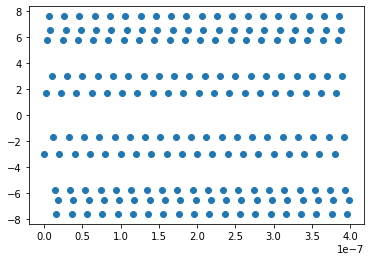

In [46]:
t = np.arange(0,len(QAM64Out)*dt, dt)
plt.scatter(t[:200], QAM64Out[:200])
plt.show()

In [47]:
out = np.zeros_like(bitstream)
for i in range(0,L,step):
    temp = QAM64Out[int(i/step*nT):int(i/step*nT)+nT].reshape((nT,1))
    temp/=myNorm(temp)
#     tis = (np.arange(i*nT,nT*(1+i),1.0))*dt
    tis = (np.arange(int(i/step*nT),int(i/step*nT)+nT,1.0))*dt
    phis = np.zeros((M,nT))
    for j in range(M):
        
        a, b = smIndexer(j,mx)
        A = np.complex(Ami[a],Ami[b]) 
        for k in range(nT):
            angle = 2*np.pi*fc*tis[k]
            phis[j][k] = (A*np.exp(np.complex(0,angle))).real
        phis[j] /= myNorm(phis[j])
    
    cor = np.matmul(phis,temp)
    m = np.argmax(cor)
    bstr = "{0:b}".format(m).zfill(step)
    for j in range(step):
        oi = 1
        if bstr[j]=='0':
            oi=0
        out[i+j] = oi

In [48]:
out

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1])

In [49]:
checkDiff(out, bitstream)

0.16666666666666666